In [10]:
# Importing Libraries
import selenium
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import requests
import re

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from selenium.common.exceptions import NoSuchElementException
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import warnings

import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
driver = webdriver.Chrome(r'C:/Users/rjhcl/Downloads/chromedriver_win32/chromedriver.exe')

In [12]:
url='https://www.cars24.com/'   
driver.get(url)

In [31]:
btn_delhi = driver.find_element_by_xpath('//ul[@class="float-right _1yq3e"]/li[3]/a').click()

In [35]:
model = []
transmission = []
fuel = []
owners = []
location = []
kms_driven = []
price = []
urls=[]

In [36]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls.append(a.get_attribute('href'))
        time.sleep(3)

In [37]:
for i in urls:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model.append(a.text)
        
    except NoSuchElementException:
        model.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location.append(a.text)
        
    except NoSuchElementException:
        location.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel.append(c.text)
        
    except NoSuchElementException:
        fuel.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven.append(c.text)
        
    except NoSuchElementException:
        kms_driven.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission.append(c.text)
        
    except NoSuchElementException:
        transmission.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners.append(d.text)
        
    except NoSuchElementException:
        owners.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price.append(d.text)
        
    except NoSuchElementException:
        price.append('-')

In [38]:
df_delhi = pd.DataFrame({})
df_delhi['Model'] = model
df_delhi['Kms driven'] = kms_driven
df_delhi['transmission'] = transmission
df_delhi['fuel type'] = fuel
df_delhi['no of owners'] = owners
df_delhi['location'] = location
df_delhi['price'] = price

In [39]:
df_delhi

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"4,151 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,73,299"
1,2014 Maruti Alto 800 VXI MANUAL,"5,383 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,85,699"
2,2015 Maruti Alto 800 LXI MANUAL,"9,217 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,61,199"
3,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"5,645 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,75,199"
4,2013 Maruti Alto 800 LXI MANUAL,"13,807 km",HR-26-x-xxxx,Petrol,1st Owner,Noida,"₹ 2,22,099"
5,2019 Hyundai XCENT PRIME T+ CNG MANUAL,199 km,DL-9C-x-xxxx,Petrol + CNG,1st Owner,Noida,"₹ 6,72,250"
6,2013 Maruti Swift ZDI MANUAL,"24,022 km",MANUAL,Diesel,1st Owner,Noida,"₹ 3,96,599"
7,2013 Maruti Alto K10 VXI MANUAL,"17,374 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,37,999"
8,2014 Maruti Alto 800 VXI MANUAL,"12,535 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,93,599"
9,2015 Maruti Swift LXI OPT MANUAL,"34,854 km",MANUAL,Petrol,1st Owner,Noida,"₹ 3,86,899"


In [40]:
df_delhi.shape

(20, 7)

In [41]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)
btn_blr = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [42]:
blr_select = driver.find_element_by_xpath('//li[@data-title="Bengaluru"]').click()

In [43]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [44]:
model_blr = []
transmission_blr = []
fuel_blr = []
owners_blr = []
location_blr = []
kms_driven_blr = []
price_blr = []
urls_blr=[]

In [45]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_blr.append(a.get_attribute('href'))
        time.sleep(3)

In [46]:
for i in urls_blr:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_blr.append(a.text)
        
    except NoSuchElementException:
        model_blr.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_blr.append(a.text)
        
    except NoSuchElementException:
        location_blr.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_blr.append(c.text)
        
    except NoSuchElementException:
        fuel_blr.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_blr.append(c.text)
        
    except NoSuchElementException:
        kms_driven_blr.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_blr.append(c.text)
        
    except NoSuchElementException:
        transmission_blr.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_blr.append(d.text)
        
    except NoSuchElementException:
        owners_blr.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_blr.append(d.text)
        
    except NoSuchElementException:
        price_blr.append('-')

In [47]:
df_blr = pd.DataFrame({})
df_blr['Model'] = model_blr
df_blr['Kms driven'] = kms_driven_blr
df_blr['transmission'] = transmission_blr
df_blr['fuel type'] = fuel_blr
df_blr['no of owners'] = owners_blr
df_blr['location'] = location_blr
df_blr['price'] = price_blr

In [48]:
df_blr

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2013 Maruti Alto 800 LXI MANUAL,"18,710 km",KA-01-x-xxxx,Petrol,2nd Owner,Bengaluru,"₹ 2,86,399"
1,2011 Hyundai Santro Xing GL PLUS MANUAL,"10,252 km",MANUAL,Petrol,1st Owner,Bengaluru,"₹ 2,94,199"
2,2020 Hyundai GRAND I10 NIOS SPORTZ 1.2 AT,"2,259 km",NA,Petrol,1st Owner,Bengaluru,"₹ 7,45,599"
3,2017 Maruti OMNI E 8 STR,"20,182 km",NA,Petrol,1st Owner,Bengaluru,"₹ 3,81,099"
4,2009 Hyundai i10 MAGNA 1.2 MANUAL,"42,203 km",MANUAL,Petrol,2nd Owner,Bengaluru,"₹ 2,44,199"
5,2017 Maruti Alto 800 LXI MANUAL,"10,742 km",MANUAL,Petrol,2nd Owner,Bengaluru,"₹ 3,55,299"
6,2016 Renault Kwid RXT MANUAL,"35,445 km",KA-53-x-xxxx,Petrol,1st Owner,Bengaluru,"₹ 3,46,199"
7,2016 Maruti Alto 800 LXI MANUAL,"6,489 km",KA-03-x-xxxx,Petrol,1st Owner,Bengaluru,"₹ 3,43,599"
8,2019 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,"6,081 km",MANUAL,Petrol,1st Owner,Bengaluru,"₹ 4,66,399"
9,2011 Hyundai i20 MAGNA O 1.2 MANUAL,"59,172 km",MANUAL,Petrol,2nd Owner,Bengaluru,"₹ 3,88,299"


In [49]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [50]:
model_mumbai = []
transmission_mumbai = []
fuel_mumbai = []
owners_mumbai = []
location_mumbai = []
kms_driven_mumbai = []
price_mumbai = []
urls_mumbai=[]

In [51]:
btn_mumbai = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [52]:
mumbai_select = driver.find_element_by_xpath('//li[@data-title="Mumbai"]').click()

In [53]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [54]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_mumbai.append(a.get_attribute('href'))
        time.sleep(3)

In [55]:
for i in urls_mumbai:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_mumbai.append(a.text)
        
    except NoSuchElementException:
        model_mumbai.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_mumbai.append(a.text)
        
    except NoSuchElementException:
        location_mumbai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_mumbai.append(c.text)
        
    except NoSuchElementException:
        fuel_mumbai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_mumbai.append(c.text)
        
    except NoSuchElementException:
        kms_driven_mumbai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_mumbai.append(c.text)
        
    except NoSuchElementException:
        transmission_mumbai.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_mumbai.append(d.text)
        
    except NoSuchElementException:
        owners_mumbai.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_mumbai.append(d.text)
        
    except NoSuchElementException:
        price_mumbai.append('-')

In [56]:
df_mumbai = pd.DataFrame({})
df_mumbai['Model'] = model_mumbai
df_mumbai['Kms driven'] = kms_driven_mumbai
df_mumbai['transmission'] = transmission_mumbai
df_mumbai['fuel type'] = fuel_mumbai
df_mumbai['no of owners'] = owners_mumbai
df_mumbai['location'] = location_mumbai
df_mumbai['price'] = price_mumbai

In [57]:
df_mumbai

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2013 Maruti SX4 VXI MANUAL,"17,984 km",MH-02-x-xxxx,Petrol,1st Owner,Mumbai,"₹ 3,15,000"
1,2012 Maruti Wagon R 1.0 VXI MANUAL,"45,836 km",MANUAL,Petrol,1st Owner,Mumbai,"₹ 3,00,299"
2,2011 Maruti Wagon R 1.0 VXI MANUAL,"27,179 km",MANUAL,Petrol,2nd Owner,Mumbai,"₹ 2,42,799"
3,2013 Maruti Alto 800 LXI MANUAL,"26,848 km",MANUAL,Petrol,1st Owner,Mumbai,"₹ 2,20,299"
4,2014 Hyundai Grand i10 ASTA 1.2 VTVT MANUAL,"24,100 km",MANUAL,Petrol,1st Owner,Mumbai,"₹ 4,04,299"
5,2016 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT M...,"20,962 km",MH-04-x-xxxx,Petrol,1st Owner,Mumbai,"₹ 4,64,099"
6,2016 Maruti Baleno ZETA 1.2 K12 MANUAL,"21,200 km",MANUAL,Petrol,2nd Owner,Mumbai,"₹ 5,74,699"
7,2017 Renault Kwid RXT 1.0 EASY-R AT MANUAL,"33,203 km",MANUAL,Petrol,3rd Owner,Mumbai,"₹ 3,03,299"
8,2017 Renault Kwid 1.0 RXT MANUAL,"12,462 km",MH-04-x-xxxx,Petrol,1st Owner,Mumbai,"₹ 3,66,499"
9,2014 Maruti Celerio VXI MANUAL,"15,206 km",MANUAL,Petrol,1st Owner,Mumbai,"₹ 3,55,399"


In [58]:
df_mumbai.shape

(20, 7)

In [59]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [60]:
model_new = []
transmission_new = []
fuel_new = []
owners_new = []
location_new = []
kms_driven_new = []
price_new = []
urls_new=[]

In [61]:
btn_new = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [62]:
new_select = driver.find_element_by_xpath('//li[@data-title="New Delhi"]').click()

In [63]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [66]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_new.append(a.get_attribute('href'))
        time.sleep(3)

In [67]:
for i in urls_new:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_new.append(a.text)
        
    except NoSuchElementException:
        model_new.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_new.append(a.text)
        
    except NoSuchElementException:
        location_new.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_new.append(c.text)
        
    except NoSuchElementException:
        fuel_new.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_new.append(c.text)
        
    except NoSuchElementException:
        kms_driven_new.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_new.append(c.text)
        
    except NoSuchElementException:
        transmission_new.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_new.append(d.text)
        
    except NoSuchElementException:
        owners_new.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_new.append(d.text)
        
    except NoSuchElementException:
        price_new.append('-')

In [68]:
df_new = pd.DataFrame({})
df_new['Model'] = model_new
df_new['Kms driven'] = kms_driven_new
df_new['transmission'] = transmission_new
df_new['fuel type'] = fuel_new
df_new['no of owners'] = owners_new
df_new['location'] = location_new
df_new['price'] = price_new

In [69]:
df_new

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2020 Maruti Alto LXI MANUAL,"7,610 km",HR-26-x-xxxx,Petrol,1st Owner,Noida,"₹ 3,57,099"
1,2018 Hyundai Grand i10 MAGNA 1.2 KAPPA VTVT MA...,"15,754 km",MANUAL,Petrol,2nd Owner,Noida,"₹ 4,62,899"
2,2017 Maruti Alto 800 LXI MANUAL,"10,608 km",MANUAL,Petrol,1st Owner,Noida,"₹ 3,00,899"
3,2010 Maruti Swift Dzire VXI MANUAL,"44,518 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,46,499"
4,2017 Maruti Alto 800 LXI MANUAL,"23,227 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,68,599"
5,2019 Maruti Alto K10 VXI MANUAL,"13,026 km",MANUAL,Petrol,2nd Owner,Noida,"₹ 3,48,299"
6,2020 Maruti Swift LXI MANUAL,"3,570 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,66,899"
7,2017 Maruti Alto 800 LXI MANUAL,"9,527 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,90,699"
8,2015 Maruti Swift VXI MANUAL,"35,725 km",MANUAL,Petrol,1st Owner,Noida,"₹ 3,98,399"
9,2014 Hyundai Grand i10 SPORTS 1.2 VTVT MANUAL,"22,836 km",MANUAL,Petrol,1st Owner,Noida,"₹ 3,76,999"


In [71]:
df_new.shape

(20, 7)

In [72]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [73]:
model_pune = []
transmission_pune = []
fuel_pune = []
owners_pune = []
location_pune = []
kms_driven_pune = []
price_pune = []
urls_pune =[]

In [74]:
btn_new = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [75]:
new_select = driver.find_element_by_xpath('//li[@data-title="Pune"]').click()

In [76]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [80]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_pune.append(a.get_attribute('href'))
        time.sleep(3)

In [81]:
for i in urls_pune:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_pune.append(a.text)
        
    except NoSuchElementException:
        model_pune.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_pune.append(a.text)
        
    except NoSuchElementException:
        location_pune.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_pune.append(c.text)
        
    except NoSuchElementException:
        fuel_pune.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_pune.append(c.text)
        
    except NoSuchElementException:
        kms_driven_pune.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_pune.append(c.text)
        
    except NoSuchElementException:
        transmission_pune.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_pune.append(d.text)
        
    except NoSuchElementException:
        owners_pune.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_pune.append(d.text)
        
    except NoSuchElementException:
        price_pune.append('-')

In [82]:
df_pune = pd.DataFrame({})
df_pune['Model'] = model_pune
df_pune['Kms driven'] = kms_driven_pune
df_pune['transmission'] = transmission_pune
df_pune['fuel type'] = fuel_pune
df_pune['no of owners'] = owners_pune
df_pune['location'] = location_pune
df_pune['price'] = price_pune

In [83]:
df_pune

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2016 Ford New Figo 1.2 TITANIUM MANUAL,"21,454 km",MH-12-x-xxxx,Petrol,3rd Owner,Pune,"₹ 4,13,399"
1,2011 Maruti Alto K10 VXI MANUAL,"57,906 km",MANUAL,Petrol,3rd Owner,Pune,"₹ 1,98,999"
2,2019 Renault TRIBER 1.0 RXZ MANUAL,"16,679 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 6,65,399"
3,2016 Maruti Alto 800 LXI MANUAL,"12,692 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 3,05,499"
4,2017 Hyundai Grand i10 MAGNA 1.2 KAPPA VTVT MA...,"20,910 km",MH-14-x-xxxx,Petrol,1st Owner,Pune,"₹ 5,33,299"
5,2018 Tata Tiago XZ 1.2 REVOTRON MANUAL,"19,960 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 4,42,299"
6,2017 Maruti Wagon R 1.0 VXI MANUAL,"24,723 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 4,34,699"
7,2011 Maruti Wagon R 1.0 LXI MANUAL,"61,495 km",MANUAL,Petrol,1st Owner,Pune,"₹ 2,70,399"
8,2012 Maruti Wagon R 1.0 VXI MANUAL,"29,755 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 2,94,599"
9,2020 Maruti S PRESSO VXI MANUAL,"8,651 km",MH-11-x-xxxx,Petrol,1st Owner,Pune,"₹ 4,59,299"


In [84]:
df_pune.shape

(20, 7)

In [85]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [86]:
model_hyderabad = []
transmission_hyderabad = []
fuel_hyderabad = []
owners_hyderabad = []
location_hyderabad = []
kms_driven_hyderabad = []
price_hyderabad = []
urls_hyderabad =[]

In [87]:
btn_hyderabad = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [89]:
new_hyderabad = driver.find_element_by_xpath('//li[@data-title="Hyderabad"]').click()

In [90]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [94]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_hyderabad.append(a.get_attribute('href'))
        time.sleep(3)

In [95]:
for i in urls_hyderabad:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_hyderabad.append(a.text)
        
    except NoSuchElementException:
        model_hyderabad.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_hyderabad.append(a.text)
        
    except NoSuchElementException:
        location_hyderabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_hyderabad.append(c.text)
        
    except NoSuchElementException:
        fuel_hyderabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_hyderabad.append(c.text)
        
    except NoSuchElementException:
        kms_driven_hyderabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_hyderabad.append(c.text)
        
    except NoSuchElementException:
        transmission_hyderabad.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_hyderabad.append(d.text)
        
    except NoSuchElementException:
        owners_hyderabad.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_hyderabad.append(d.text)
        
    except NoSuchElementException:
        price_hyderabad.append('-')

In [96]:
df_hyderabad = pd.DataFrame({})
df_hyderabad['Model'] = model_hyderabad
df_hyderabad['Kms driven'] = kms_driven_hyderabad
df_hyderabad['transmission'] = transmission_hyderabad
df_hyderabad['fuel type'] = fuel_hyderabad
df_hyderabad['no of owners'] = owners_hyderabad
df_hyderabad['location'] = location_hyderabad
df_hyderabad['price'] = price_hyderabad

In [97]:
df_hyderabad

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2011 Maruti Wagon R 1.0 LXI MANUAL,"20,979 km",MANUAL,Petrol,1st Owner,Hyderabad,"₹ 3,28,399"
1,2016 Hyundai Eon ERA PLUS MANUAL,"10,674 km",MANUAL,Petrol,2nd Owner,Hyderabad,"₹ 3,07,299"
2,2011 Maruti Alto LXI MANUAL,"23,837 km",MANUAL,Petrol,1st Owner,Hyderabad,"₹ 2,24,499"
3,2017 Hyundai Grand i10 SPORTS 1.2 VTVT MANUAL,"18,950 km",MANUAL,Petrol,2nd Owner,Hyderabad,"₹ 4,83,799"
4,2017 Maruti Alto 800 LXI OPT MANUAL,"7,995 km",TS-07-x-xxxx,Petrol,1st Owner,Hyderabad,"₹ 3,38,099"
5,2012 Maruti Alto 800 LXI MANUAL,"44,791 km",MANUAL,Petrol,2nd Owner,Hyderabad,"₹ 2,56,799"
6,2011 Maruti Alto LXI MANUAL,"31,119 km",MANUAL,Petrol,1st Owner,Hyderabad,"₹ 2,22,499"
7,2013 Maruti Alto 800 LXI MANUAL,"31,384 km",MANUAL,Petrol,1st Owner,Hyderabad,"₹ 2,63,199"
8,2011 Maruti Wagon R 1.0 LXI MANUAL,"63,165 km",MANUAL,Petrol,1st Owner,Hyderabad,"₹ 2,95,399"
9,2012 Hyundai i10 SPORTZ 1.2 AT KAPPA2 AUTOMATIC,"49,548 km",AUTOMATIC,Petrol,2nd Owner,Hyderabad,"₹ 3,49,399"


In [98]:
df_hyderabad.shape

(20, 7)

In [99]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [100]:
model_kolkata = []
transmission_kolkata = []
fuel_kolkata = []
owners_kolkata = []
location_kolkata = []
kms_driven_kolkata = []
price_kolkata = []
urls_kolkata =[]

In [101]:
btn_kolkata = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [103]:
new_kolkata = driver.find_element_by_xpath('//li[@data-title="Kolkata"]').click()

In [104]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [107]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_kolkata.append(a.get_attribute('href'))
        time.sleep(3)

In [108]:
for i in urls_kolkata:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_kolkata.append(a.text)
        
    except NoSuchElementException:
        model_kolkata.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_kolkata.append(a.text)
        
    except NoSuchElementException:
        location_kolkata.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_kolkata.append(c.text)
        
    except NoSuchElementException:
        fuel_kolkata.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_kolkata.append(c.text)
        
    except NoSuchElementException:
        kms_driven_kolkata.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_kolkata.append(c.text)
        
    except NoSuchElementException:
        transmission_kolkata.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_kolkata.append(d.text)
        
    except NoSuchElementException:
        owners_kolkata.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_kolkata.append(d.text)
        
    except NoSuchElementException:
        price_kolkata.append('-')

In [109]:
df_kolkata = pd.DataFrame({})
df_kolkata['Model'] = model_kolkata
df_kolkata['Kms driven'] = kms_driven_kolkata
df_kolkata['transmission'] = transmission_kolkata
df_kolkata['fuel type'] = fuel_kolkata
df_kolkata['no of owners'] = owners_kolkata
df_kolkata['location'] = location_kolkata
df_kolkata['price'] = price_kolkata

In [110]:
df_kolkata

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2018 Maruti Ertiga VXI MANUAL,"11,837 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 6,74,899"
1,2015 Honda City SV MT PETROL MANUAL,"50,173 km",MANUAL,Petrol,2nd Owner,Kolkata,"₹ 5,02,599"
2,2018 Hyundai Verna 1.6 SX VTVT MANUAL,"14,118 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 7,90,999"
3,2017 Hyundai Grand i10 MAGNA 1.2 VTVT MANUAL,"20,561 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 4,79,899"
4,2015 Maruti Wagon R 1.0 VXI MANUAL,"52,942 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 3,01,399"
5,2016 Hyundai Eon ERA PLUS MANUAL,"33,886 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 3,45,499"
6,2012 Maruti Alto 800 LXI MANUAL,"38,732 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 2,85,499"
7,2018 Honda City VX MT PETROL MANUAL,"15,201 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 8,34,199"
8,2019 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT M...,"19,168 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 5,74,299"
9,2018 Maruti IGNIS DELTA 1.2 K12 MANUAL,"30,763 km",MANUAL,Petrol,1st Owner,Kolkata,"₹ 4,53,899"


In [111]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [112]:
model_chennai = []
transmission_chennai = []
fuel_chennai = []
owners_chennai = []
location_chennai = []
kms_driven_chennai = []
price_chennai = []
urls_chennai =[]

In [113]:
btn_chennai = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [114]:
new_chennai = driver.find_element_by_xpath('//li[@data-title="Chennai"]').click()

In [115]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [119]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_chennai.append(a.get_attribute('href'))
        time.sleep(3)

In [120]:
for i in urls_chennai:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_chennai.append(a.text)
        
    except NoSuchElementException:
        model_chennai.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_chennai.append(a.text)
        
    except NoSuchElementException:
        location_chennai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_chennai.append(c.text)
        
    except NoSuchElementException:
        fuel_chennai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_chennai.append(c.text)
        
    except NoSuchElementException:
        kms_driven_chennai.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_chennai.append(c.text)
        
    except NoSuchElementException:
        transmission_chennai.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_chennai.append(d.text)
        
    except NoSuchElementException:
        owners_chennai.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_chennai.append(d.text)
        
    except NoSuchElementException:
        price_chennai.append('-')

In [121]:
df_chennai = pd.DataFrame({})
df_chennai['Model'] = model_chennai
df_chennai['Kms driven'] = kms_driven_chennai
df_chennai['transmission'] = transmission_chennai
df_chennai['fuel type'] = fuel_chennai
df_chennai['no of owners'] = owners_chennai
df_chennai['location'] = location_chennai
df_chennai['price'] = price_chennai

In [122]:
df_chennai

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2020 Maruti Alto LXI MANUAL,"3,494 km",TN-18-x-xxxx,Petrol,1st Owner,Chennai,"₹ 4,19,599"
1,2011 Hyundai i10 MAGNA 1.2 KAPPA2 MANUAL,"13,179 km",MANUAL,Petrol,1st Owner,Chennai,"₹ 3,18,999"
2,2011 Maruti Alto LXI MANUAL,"23,217 km",MANUAL,Petrol,1st Owner,Chennai,"₹ 2,48,099"
3,2014 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,"18,371 km",MANUAL,Petrol,1st Owner,Chennai,"₹ 3,54,499"
4,2020 Renault Kwid 1.0 RXT Opt AT AUTOMATIC,"4,824 km",TN-01-x-xxxx,Petrol,1st Owner,Chennai,"₹ 4,83,299"
5,2014 Maruti Swift Dzire VXI 1.2 BS IV MANUAL,"10,131 km",MANUAL,Petrol,1st Owner,Chennai,"₹ 4,92,099"
6,2010 Maruti Alto K10 LXI MANUAL,"33,888 km",MANUAL,Petrol,1st Owner,Chennai,"₹ 2,21,799"
7,2011 Maruti Alto K10 LXI MANUAL,"42,789 km",MANUAL,Petrol,2nd Owner,Chennai,"₹ 2,20,999"
8,2017 Maruti Alto 800 LXI MANUAL,"12,389 km",TN-22-x-xxxx,Petrol,1st Owner,Chennai,"₹ 3,22,199"
9,2016 Hyundai Grand i10 SPORTS 1.2 VTVT MANUAL,"31,883 km",TN-01-x-xxxx,Petrol,2nd Owner,Chennai,"₹ 4,15,899"


In [123]:
df_chennai.shape

(20, 7)

In [124]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [125]:
model_gurgaon = []
transmission_gurgaon = []
fuel_gurgaon = []
owners_gurgaon = []
location_gurgaon = []
kms_driven_gurgaon = []
price_gurgaon = []
urls_gurgaon =[]

In [126]:
btn_gurgaon = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [127]:
new_gurgaon = driver.find_element_by_xpath('//li[@data-title="Gurgaon"]').click()

In [128]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [129]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_gurgaon.append(a.get_attribute('href'))
        time.sleep(3)

In [130]:
for i in urls_gurgaon:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_gurgaon.append(a.text)
        
    except NoSuchElementException:
        model_gurgaon.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_gurgaon.append(a.text)
        
    except NoSuchElementException:
        location_gurgaon.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_gurgaon.append(c.text)
        
    except NoSuchElementException:
        fuel_gurgaon.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_gurgaon.append(c.text)
        
    except NoSuchElementException:
        kms_driven_gurgaon.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_gurgaon.append(c.text)
        
    except NoSuchElementException:
        transmission_gurgaon.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_gurgaon.append(d.text)
        
    except NoSuchElementException:
        owners_gurgaon.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_gurgaon.append(d.text)
        
    except NoSuchElementException:
        price_gurgaon.append('-')

In [131]:
df_gurgaon = pd.DataFrame({})
df_gurgaon['Model'] = model_gurgaon
df_gurgaon['Kms driven'] = kms_driven_gurgaon
df_gurgaon['transmission'] = transmission_gurgaon
df_gurgaon['fuel type'] = fuel_gurgaon
df_gurgaon['no of owners'] = owners_gurgaon
df_gurgaon['location'] = location_gurgaon
df_gurgaon['price'] = price_gurgaon

In [132]:
df_gurgaon

,Model,Kms driven,transmission,fuel type,no of owners,location,price


In [133]:
df_gurgaon.shape

(0, 7)

In [134]:
url = "https://www.cars24.com/buy-used-cars/"
driver.get(url)

In [135]:
model_ahmedabad = [] 
transmission_ahmedabad = []
fuel_ahmedabad = []
owners_ahmedabad = []
location_ahmedabad = []
kms_driven_ahmedabad = []
price_ahmedabad = []
urls_ahmedabad =[]

In [136]:
btn_ahmedabad = driver.find_element_by_xpath('//p[@class="_1OR7d"]/span[1]/img[1]').click()

In [137]:
new_ahmedabad = driver.find_element_by_xpath('//li[@data-title="Ahmedabad"]').click()

In [138]:
btn = driver.find_element_by_xpath('//button[@class="btn _3BmFU AgO6q"]').click()

In [139]:
product_click = driver.find_elements_by_xpath('//a[@class="_9Ue0B"]')
for i in range(0,1):
    for a in product_click:
        time.sleep(3)
        urls_ahmedabad.append(a.get_attribute('href'))
        time.sleep(3)

In [140]:
for i in urls_ahmedabad:
    driver.get(i)
    time.sleep(6)
    try:
        for a in driver.find_elements_by_xpath('//h2[@class="_2geSF"]'):
            model_ahmedabad.append(a.text)
        
    except NoSuchElementException:
        model_ahmedabad.append('-')
    
    time.sleep(5)
    
    try:
        for a in driver.find_elements_by_xpath('//span[@class="_2OIMj"]'):
            location_ahmedabad.append(a.text)
        
    except NoSuchElementException:
        location_ahmedabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[3]'):
            fuel_ahmedabad.append(c.text)
        
    except NoSuchElementException:
        fuel_ahmedabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2tp8h"]/li[1]'):
            kms_driven_ahmedabad.append(c.text)
        
    except NoSuchElementException:
        kms_driven_ahmedabad.append('-')
        
    time.sleep(5)
        
    try:
        for c in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[6]/strong[1]'):
            transmission_ahmedabad.append(c.text)
        
    except NoSuchElementException:
        transmission_ahmedabad.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_2KO13"]/li[2]/strong[1]'):
            owners_ahmedabad.append(d.text)
        
    except NoSuchElementException:
        owners_ahmedabad.append('-')
    
    time.sleep(5)
    
    try:
        for d in driver.find_elements_by_xpath('//ul[@class="_10Etm"]/li[1]/span[2]'):
            price_ahmedabad.append(d.text)
        
    except NoSuchElementException:
        price_ahmedabad.append('-')

In [141]:
df_ahmedabad = pd.DataFrame({})
df_ahmedabad['Model'] = model_ahmedabad
df_ahmedabad['Kms driven'] = kms_driven_ahmedabad
df_ahmedabad['transmission'] = transmission_ahmedabad
df_ahmedabad['fuel type'] = fuel_ahmedabad
df_ahmedabad['no of owners'] = owners_ahmedabad
df_ahmedabad['location'] = location_ahmedabad
df_ahmedabad['price'] = price_ahmedabad

In [142]:
df_ahmedabad

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2021 Hyundai VENUE S MT 1.2 KAPPA MANUAL,"5,656 km",GJ-05-x-xxxx,Petrol,1st Owner,Ahmedabad,"₹ 8,07,999"
1,2017 Hyundai Grand i10 Magna 1.2 AT VTVT AUTOM...,"10,931 km",AUTOMATIC,Petrol,3rd Owner,Ahmedabad,"₹ 5,00,499"
2,2020 Maruti Baleno DELTA 1.2 K12 MANUAL,"4,560 km",MANUAL,Petrol,1st Owner,Ahmedabad,"₹ 6,75,699"
3,2018 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT M...,"14,369 km",MANUAL,Petrol,1st Owner,Ahmedabad,"₹ 5,20,699"
4,2016 Maruti Alto K10 VXI MANUAL,"10,179 km",GJ-01-x-xxxx,Petrol,1st Owner,Ahmedabad,"₹ 3,31,599"
5,2019 Maruti Alto 800 LXI MANUAL,"8,040 km",MANUAL,Petrol,1st Owner,Ahmedabad,"₹ 3,37,499"
6,2020 Maruti IGNIS SIGMA 1.2 K12 MANUAL,"3,142 km",MANUAL,Petrol,1st Owner,Ahmedabad,"₹ 5,16,699"
7,2015 Maruti Swift VDI ABS MANUAL,"31,933 km",GJ-02-x-xxxx,Diesel,1st Owner,Ahmedabad,"₹ 4,59,199"
8,2020 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,"3,735 km",MANUAL,Petrol,1st Owner,Ahmedabad,"₹ 4,95,899"
9,2019 Renault Kwid RXL MANUAL,"6,684 km",GJ-05-x-xxxx,Petrol,1st Owner,Ahmedabad,"₹ 3,84,699"


In [143]:
frames = [df_delhi,df_blr,df_mumbai,df_new,df_ahmedabad,df_gurgaon,df_chennai,df_kolkata,df_hyderabad,df_pune]
df = pd.concat(frames)

In [144]:
df

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"4,151 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,73,299"
1,2014 Maruti Alto 800 VXI MANUAL,"5,383 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,85,699"
2,2015 Maruti Alto 800 LXI MANUAL,"9,217 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,61,199"
3,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"5,645 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,75,199"
4,2013 Maruti Alto 800 LXI MANUAL,"13,807 km",HR-26-x-xxxx,Petrol,1st Owner,Noida,"₹ 2,22,099"
...,...,...,...,...,...,...,...
15,2014 Maruti Alto 800 LXI MANUAL,"34,408 km",MANUAL,Petrol,1st Owner,Pune,"₹ 2,59,399"
16,2014 Maruti Alto 800 LXI MANUAL,"22,626 km",MANUAL,Petrol,2nd Owner,Pune,"₹ 2,55,299"
17,2015 Maruti Ciaz ZXI PLUS MANUAL,"38,851 km",MANUAL,Petrol,1st Owner,Pune,"₹ 6,21,799"
18,2017 Maruti Alto 800 LXI MANUAL,"12,393 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 3,47,899"


In [145]:
# first 5
df.head()

,Model,Kms driven,transmission,fuel type,no of owners,location,price
0,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"4,151 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,73,299"
1,2014 Maruti Alto 800 VXI MANUAL,"5,383 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,85,699"
2,2015 Maruti Alto 800 LXI MANUAL,"9,217 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,61,199"
3,2020 Maruti Baleno SIGMA 1.2 K12 MANUAL,"5,645 km",MANUAL,Petrol,1st Owner,Noida,"₹ 5,75,199"
4,2013 Maruti Alto 800 LXI MANUAL,"13,807 km",HR-26-x-xxxx,Petrol,1st Owner,Noida,"₹ 2,22,099"


In [146]:
# last 5
df.tail()

,Model,Kms driven,transmission,fuel type,no of owners,location,price
15,2014 Maruti Alto 800 LXI MANUAL,"34,408 km",MANUAL,Petrol,1st Owner,Pune,"₹ 2,59,399"
16,2014 Maruti Alto 800 LXI MANUAL,"22,626 km",MANUAL,Petrol,2nd Owner,Pune,"₹ 2,55,299"
17,2015 Maruti Ciaz ZXI PLUS MANUAL,"38,851 km",MANUAL,Petrol,1st Owner,Pune,"₹ 6,21,799"
18,2017 Maruti Alto 800 LXI MANUAL,"12,393 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 3,47,899"
19,2015 Maruti Alto 800 VXI MANUAL,"31,631 km",MH-12-x-xxxx,Petrol,1st Owner,Pune,"₹ 2,72,599"


In [147]:
df.shape

(180, 7)

In [148]:
# we have 201 rows and 7 columns

In [149]:
df.describe()

,Model,Kms driven,transmission,fuel type,no of owners,location,price
count,180,180,180,180,180,180,180
unique,131,180,33,3,3,9,176
top,2017 Maruti Alto 800 LXI MANUAL,"2,259 km",MANUAL,Petrol,1st Owner,Noida,"₹ 2,55,299"
freq,10,1,121,175,145,39,2


#### we have 139 different models. most of the models are 2014 Maruti Alto 800 LXI MANUAL. there are 2 fuel types. most of them have their fuel type as petrol. most of the cars have 1 owner

In [150]:
# lets see if we have any null values in our dataset
df.isnull().sum()

Model           0
Kms driven      0
transmission    0
fuel type       0
no of owners    0
location        0
price           0
dtype: int64

#### we can see that we have no null values in our dataset

In [151]:
# lets check the columns in the dataset
df.columns

Index(['Model', 'Kms driven', 'transmission', 'fuel type', 'no of owners',
       'location', 'price'],
      dtype='object')

In [152]:
df['price'] = df['price'].replace({'₹ ':''}, regex=True)
df['price'] = df['price'].replace({',':''}, regex=True)

In [153]:
X = df.drop(['price'],axis=1)
y = df['price']

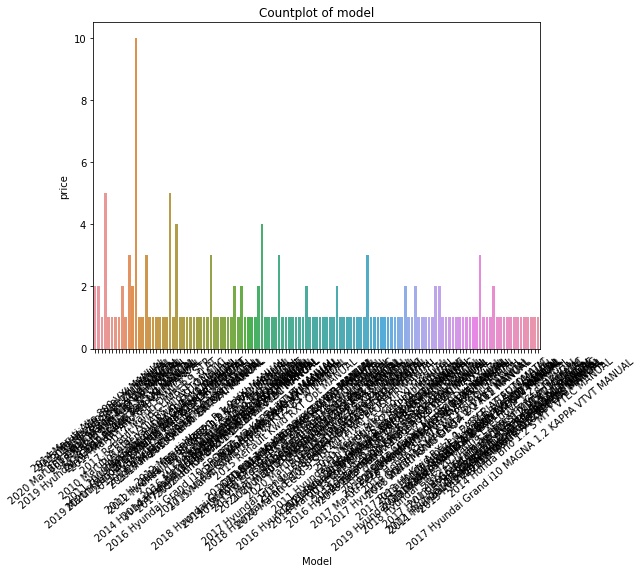

2017 Maruti Alto 800 LXI MANUAL                      10
2016 Maruti Alto 800 LXI MANUAL                       5
2013 Maruti Alto 800 LXI MANUAL                       5
2014 Maruti Alto 800 LXI MANUAL                       4
2020 Maruti Alto LXI MANUAL                           4
                                                     ..
2017 Hyundai Grand i10 SPORTS 1.2 VTVT MANUAL         1
2012 Hyundai i10 SPORTZ 1.2 AT KAPPA2 AUTOMATIC       1
2017 Maruti Ertiga VXI ABS MANUAL                     1
2014 Hyundai Grand i10 ASTA 1.2 KAPPA VTVT MANUAL     1
2020 Maruti Baleno DELTA 1.2 K12 MANUAL               1
Name: Model, Length: 131, dtype: int64

In [154]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Model", data=X)
plt.title("Countplot of model")
plt.xticks(rotation=40)
plt.xlabel('Model')
plt.ylabel("price")
plt.show()

X['Model'].value_counts()

In [155]:
categorical_cols = ['Model', 'Kms driven', 'transmission', 'fuel type', 'no of owners', 'location'] 

X = pd.get_dummies(X, columns = categorical_cols, drop_first=True)

In [156]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1=pd.DataFrame(x1,columns=X.columns)

In [157]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=1)

In [158]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       SVR(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 1.0
Error:
Mean absolute error: 94608.3685205059
Mean squared error: 15158754394.11447
Root Mean Squared Error: 123120.89341015386
r2_score: 0.18071622042293967
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 96943.05555555556
Mean squared error: 16227011988.944445
Root Mean Squared Error: 127385.28953118742
r2_score: 0.12298020220537376
*************************************************************


score of SVR() is: -0.0854588932004976
Error:
Mean absolute error: 91581.79473407615
Mean squared error: 18548381863.50328
Root Mean Squared Error: 136192.44422325082
r2_score: -0.0024826580784043095
*************************************************************


score of RandomForestRegressor() is: 0.8814921370969261
Error:
Mean absolute error: 95940.06111111112
Mean squared error: 15836668202.157005
Root Mean Squared Error: 125843.8246484785
r2_score: 0.14407707630591327
*

In [159]:
# lets use gradient boosting regressor as it is the best algorithm for this model and dataset
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred = gb.predict(x_test)

In [160]:
# Let's save our best model

import joblib
joblib.dump(pred,'model.pkl')

['model.pkl']